In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('out.csv')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,energy,instrumentalness,key,loudness,mode,speechiness,tempo,time_signature,valence,liveness
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,0.697,0.000370,1.0,-5.520,0.0,0.0439,138.029,4.0,0.919,0.0678
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,0.472,0.000000,1.0,-7.001,1.0,0.0776,101.061,4.0,0.214,0.1410
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,0.946,0.010600,11.0,-4.263,1.0,0.0447,151.647,4.0,0.747,0.0826
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,0.691,0.000070,0.0,-4.775,1.0,0.0633,118.048,4.0,0.632,0.0232
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,0.887,0.000002,9.0,-2.760,0.0,0.0683,127.003,4.0,0.889,0.0582


In [31]:
df['Release Date']=pd.to_datetime(df['Release Date'], format = "%m/%d/%Y")

In [32]:
df['Spotify Streams']= df['Spotify Streams'].replace(',','', regex=True)

df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'].fillna(0), downcast = 'integer', errors='coerce').fillna(0)

strings_to_nums = df[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes'
                               ,'TikTok Posts','TikTok Likes','TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins'
                               ,'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']].fillna(0)
strings_to_nums = strings_to_nums.replace(',','', regex=True)
strings_to_nums = strings_to_nums.apply(pd.to_numeric, args =('coerce','integer')).fillna('0')

df[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes'
             ,'TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins','Deezer Playlist Reach','Pandora Streams','Pandora Track Stations'
             ,'Soundcloud Streams','Shazam Counts']] = strings_to_nums
df[['Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']] = df[['Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']].fillna(0).astype(int)

df['Explicit Track']= df['Explicit Track'].astype(bool)


In [33]:
df.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          int16
Track Score                          float64
Spotify Streams                        int64
Spotify Playlist Count                 int32
Spotify Playlist Reach                 int32
Spotify Popularity                     int32
YouTube Views                          int64
YouTube Likes                          int32
TikTok Posts                           int32
TikTok Likes                           int64
TikTok Views                           int64
YouTube Playlist Reach                 int64
Apple Music Playlist Count             int32
AirPlay Spins                          int32
SiriusXM Spins                         int16
Deezer Playlist Count                  int32
Deezer Playlist Reach                  int32
Amazon Pla

In [34]:
import ast
lst = [ast.literal_eval(e) for e in df['Artist Genre']]
df['Artist Genre'] = lst

In [35]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,energy,instrumentalness,key,loudness,mode,speechiness,tempo,time_signature,valence,liveness
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,0.697,0.000370,1.0,-5.520,0.0,0.0439,138.029,4.0,0.919,0.0678
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,174597137,...,0.472,0.000000,1.0,-7.001,1.0,0.0776,101.061,4.0,0.214,0.1410
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,0.946,0.010600,11.0,-4.263,1.0,0.0447,151.647,4.0,0.747,0.0826
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,0.691,0.000070,0.0,-4.775,1.0,0.0633,118.048,4.0,0.632,0.0232
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,151469874,...,0.887,0.000002,9.0,-2.760,0.0,0.0683,127.003,4.0,0.889,0.0582


In [36]:
for (idx, val) in enumerate(df['Artist Genre']):
    if not val:
        df['Artist Genre'][idx] = 'Too new'

C:\Users\boz42\AppData\Local\Temp\ipykernel_16504\4169184503.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Artist Genre'][idx] = 'Too new'
C:\Users\boz42\AppData\Local\Temp\ipykernel_16504\4169184503.py:3: SettingWithCopyWarning: 


In [37]:
freq_genre = {'Too new': 0}

for (idx, val) in enumerate(df['Artist Genre']):
    if val != 'Too new':
        s = set(val)
        for e in s:
            try:
                freq_genre[e] += 1
            except:
                freq_genre[e] = 0
                freq_genre[e] += 1
    else:
        freq_genre['Too new'] += 1


sorted_freq_genre = {k: v for k, v in sorted(freq_genre.items(), key=lambda item: item[1], reverse = True)}
print(sorted_freq_genre)

{'pop': 920, 'rap': 677, 'urbano latino': 449, 'trap latino': 414, 'Too new': 380, 'reggaeton': 343, 'hip hop': 327, 'pop rap': 249, 'trap': 242, 'dance pop': 240, 'melodic rap': 144, 'atl hip hop': 134, 'pop dance': 131, 'canadian pop': 128, 'edm': 126, 'latin pop': 120, 'k-pop': 116, 'southern hip hop': 115, 'contemporary country': 114, 'reggaeton colombiano': 113, 'filmi': 100, 'r&b': 98, 'sad sierreno': 97, 'rock': 92, 'uk pop': 89, 'corrido': 86, 'modern bollywood': 86, 'sierreno': 82, 'modern rock': 81, 'k-pop girl group': 80, 'colombian pop': 75, 'corridos tumbados': 71, 'canadian hip hop': 71, 'uk dance': 68, 'chicago rap': 63, 'pov: indie': 61, 'musica mexicana': 61, 'afrobeats': 59, 'singer-songwriter pop': 57, 'country': 55, 'trap argentino': 54, 'house': 53, 'art pop': 51, 'slap house': 48, 'electro house': 47, 'punjabi pop': 47, 'desi pop': 45, 'nigerian pop': 44, 'country road': 44, 'puerto rican pop': 42, 'canadian contemporary r&b': 42, 'k-pop boy group': 42, 'miami hip

In [38]:
freq_genre = pd.DataFrame(data=[*sorted_freq_genre.items()], columns=['Genre', 'Freq'])
freq_genre

,Genre,Freq
0,pop,920
1,rap,677
2,urbano latino,449
3,trap latino,414
4,Too new,380
...,...,...
924,mexican indie,1
925,indie triste,1
926,bubblegum dance,1
927,diva house,1


In [39]:
sorted_freq_percent_genre = {k: (v * 100.0/sum(sorted_freq_genre.values())) for k, v in sorted_freq_genre.items()}

freq_percent_genre = pd.DataFrame(data=[*sorted_freq_percent_genre.items()], columns=['Genre', 'Freq Percent'])
freq_percent_genre

,Genre,Freq Percent
0,pop,7.757167
1,rap,5.708263
2,urbano latino,3.785835
3,trap latino,3.490725
4,Too new,3.204047
...,...,...
924,mexican indie,0.008432
925,indie triste,0.008432
926,bubblegum dance,0.008432
927,diva house,0.008432


In [40]:
top10 = {k: (sorted_freq_genre[k]) for k in list(sorted_freq_genre)[:10]}
top10_percent = {k: (v * 100.0 / sum(top10.values())) for k, v in top10.items()}
df10 = pd.DataFrame(data=[*top10_percent.items()], columns=['Genre', 'Freq Percent'])

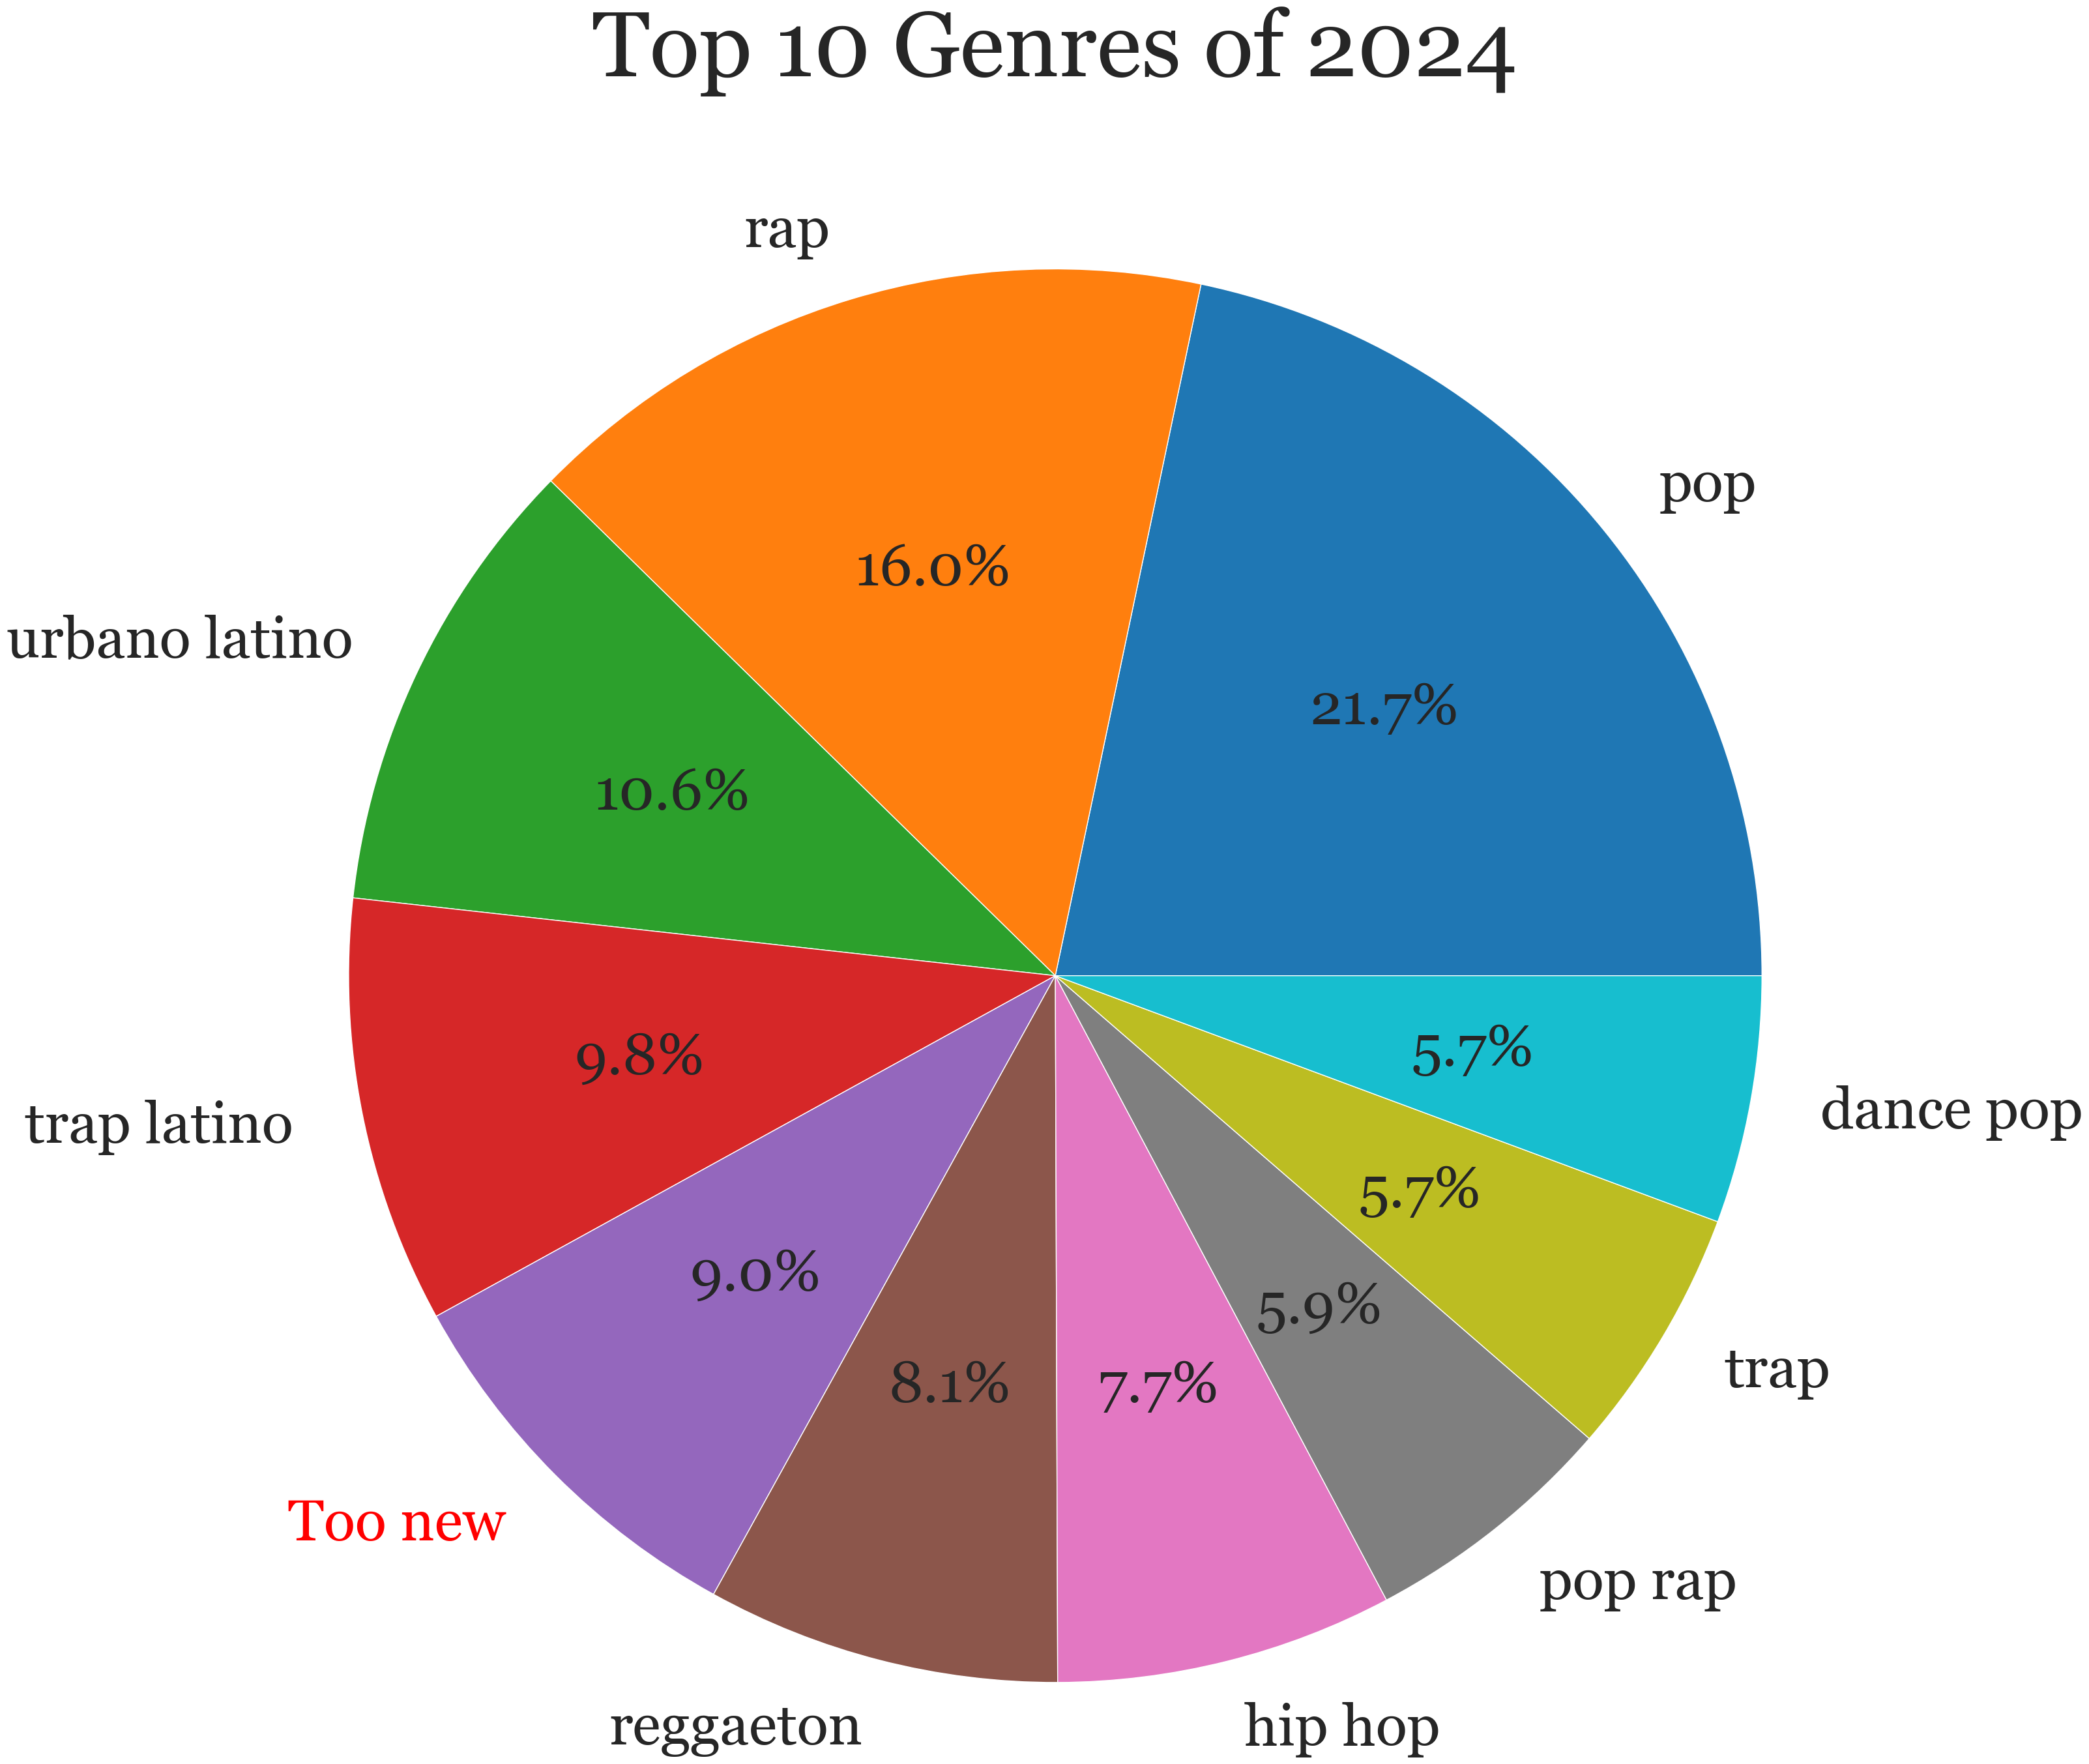

In [41]:
top_10 = [
    'pop',
    'rap',
    'urbano latino',
    'trap latino',
    'Too new',
    'reggaeton',
    'hip hop',
    'pop rap',
    'trap',
    'dance pop'
]

plt.rcParams.update({'font.size': 64, 'font.family': 'Georgia'})
top10Genre = df10.plot(kind = 'pie', y = 'Freq Percent', labels=df10['Genre'], autopct='%1.1f%%', radius=2.2, figsize=(16, 16), legend=False)
top10Genre.xaxis.set_label_position('top') 
top10Genre.set_xlabel('Top 10 Genres of 2024', labelpad=550, fontsize=102)
top10Genre.set_ylabel('')
top10Genre.texts[8].set_color('red')

In [42]:
top10Genre.get_figure().savefig('top10Genre-trans.png', bbox_inches='tight', transparent=True)
top10Genre.get_figure().savefig('top10Genre-white.png', bbox_inches='tight')

In [43]:
# Get all songs with g genre
# Find platform it did best in, increment

# Spotify
# YouTube
# TikTok
# Pandora
# SoundCloud

genre_dict = {'pop': [], 'rap': [], 'urbano latino': [], 'trap latino': [], 'Too new': [], 'reggaeton': [], 'hip hop': [], 'pop rap': [], 'trap': [], 'dance pop': []}


for genre in top_10:
    for (idx, e) in enumerate(df['Artist Genre']):
        if genre in e:
            genre_dict[genre].append(idx)



In [44]:
genre_dict_top = {'pop': {}, 'rap': {}, 'urbano latino': {}, 'trap latino': {}, 'Too new': {}, 'reggaeton': {}, 'hip hop': {}, 'pop rap': {}, 'trap': {}, 'dance pop': {}}

for e in genre_dict_top:
    genre_dict_top[e] = ({'Spotify': 0, 'YouTube': 0, 'TikTok': 0, 'Pandora': 0, 'SoundCloud': 0})

for genre in genre_dict:
    for idx in genre_dict[genre]:
        spotify = df['Spotify Streams'][idx]
        youtube = df['YouTube Views'][idx]
        tiktok = df['TikTok Views'][idx]
        pandora = df['Pandora Streams'][idx]
        soundcloud = df['Soundcloud Streams'][idx]
        
        temp = []
        temp.append(spotify)
        temp.append(youtube)
        temp.append(tiktok)
        temp.append(pandora)
        temp.append(soundcloud)
        
        mx = max(temp)
        if mx == 0: continue
        max_idx = temp.index(max(temp))
        
        if max_idx == 0:
            genre_dict_top[genre]['Spotify']+=1
        elif max_idx == 1:
            genre_dict_top[genre]['YouTube']+=1
        elif max_idx == 2:
            genre_dict_top[genre]['TikTok']+=1
        elif max_idx == 3:
            genre_dict_top[genre]['Pandora']+=1
        elif max_idx == 4:
            genre_dict_top[genre]['SoundCloud']+=1


In [45]:
genre_df = pd.DataFrame(genre_dict_top).T
genre_df = genre_df.reset_index()
genre_df = genre_df.rename(columns={'index': 'Genre'})
genre_df.head(10)
genre_df = genre_df.drop(columns=['Pandora', 'SoundCloud'])

Text(0, 0.5, '# of tracks performing best per platform')

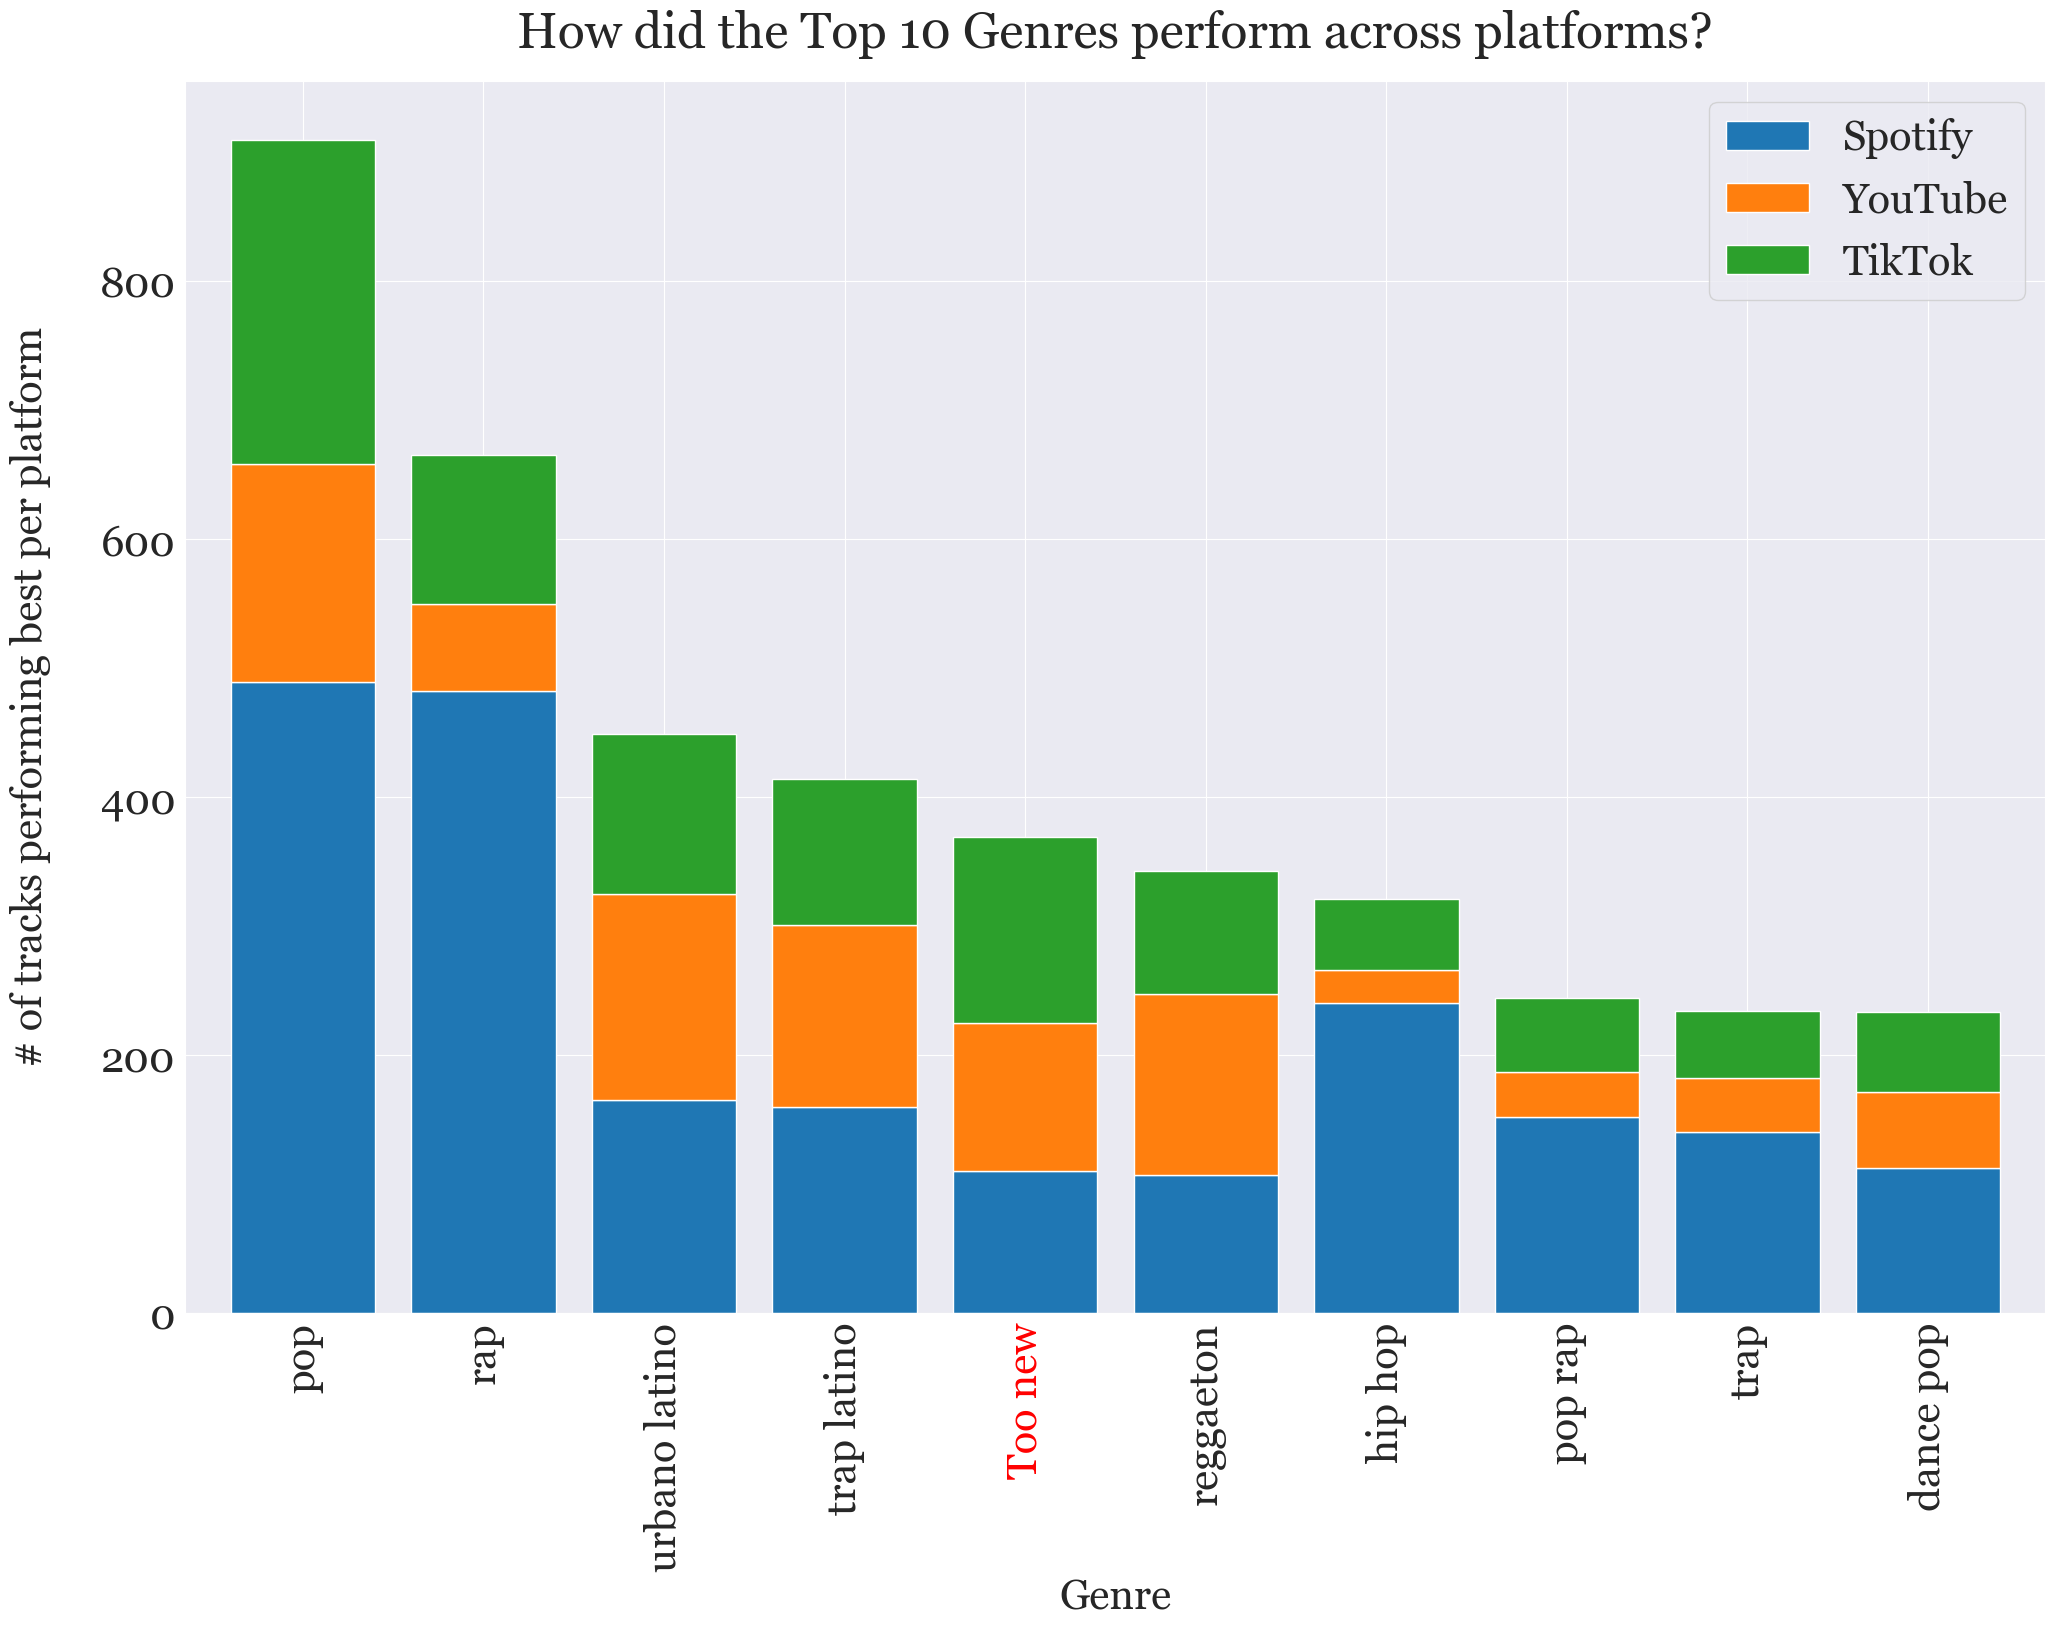

In [49]:
plt.rcParams.update({'font.size': 30, 'font.family': 'Georgia'})
ax = genre_df.plot(x='Genre',
              kind='bar',
              stacked=True,
              title='How did the Top 10 Genres perform across platforms?',
              width=0.8,
              figsize=(24, 16))

ax.get_xticklabels()[4].set_color('red')
ax.set_title('How did the Top 10 Genres perform across platforms?', y=1.02)
ax.set_ylabel('# of tracks performing best per platform', labelpad=35)

In [50]:
ax.get_figure().savefig('Graphs/genre-over-platform.png', bbox_inches='tight', transparent=True)